In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib
from sklearn.metrics import plot_confusion_matrix

In [4]:
ls

 Volume in drive H is Courses
 Volume Serial Number is 4408-8541

 Directory of H:\Projects\Epsilon InternShip\Zomato Restaurants

07/24/2022  02:11 AM    <DIR>          .
07/24/2022  02:11 AM    <DIR>          ..
07/23/2022  03:20 AM                25 .gitignore
07/15/2022  11:53 AM    <DIR>          .ipynb_checkpoints
07/23/2022  09:06 PM           141,413 [1] Data Preprocessing.ipynb
07/23/2022  09:06 PM           101,712 [2] EDA.ipynb
07/24/2022  02:11 AM             7,683 [3] Model Building.ipynb
07/24/2022  02:09 AM               754 deploy.py
07/23/2022  04:19 PM           330,158 pipline.pkl
07/23/2022  02:26 AM       552,974,078 processedData.csv
07/23/2022  06:04 PM    <DIR>          templates
09/28/2021  01:38 PM       574,072,999 zomato.csv
               8 File(s)  1,127,628,822 bytes
               4 Dir(s)  117,279,977,472 bytes free


In [5]:
data = pd.read_csv('processedData.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city,cuisinesCount
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,30
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,27
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,1,918,Banashankari,other,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,22
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,0,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,26
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,1,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,24


In [6]:
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city', 'cuisinesCount'],
      dtype='object')

In [7]:
usefulColumns = ['online_order','book_table','rate','votes','cost','type','city','cuisinesCount','rest_type']
data = data[usefulColumns]
data.head()

,online_order,book_table,rate,votes,cost,type,city,cuisinesCount,rest_type
0,1,1,1,775,800.0,Buffet,Banashankari,30,Casual Dining
1,1,0,1,787,800.0,Buffet,Banashankari,27,Casual Dining
2,1,0,1,918,800.0,Buffet,Banashankari,22,other
3,0,0,0,88,300.0,Buffet,Banashankari,26,Quick Bites
4,0,0,1,166,600.0,Buffet,Banashankari,24,Casual Dining


In [8]:
data['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [9]:
data['city'].nunique()

30

In [10]:
X = data.drop('rate',axis=1)
Y= data['rate']

In [11]:
X.isnull().sum()

online_order     0
book_table       0
votes            0
cost             0
type             0
city             0
cuisinesCount    0
rest_type        0
dtype: int64

In [12]:
data.dtypes

online_order       int64
book_table         int64
rate               int64
votes              int64
cost             float64
type              object
city              object
cuisinesCount      int64
rest_type         object
dtype: object

In [13]:
numericalColumns = [col for col in X.columns if X[col].dtype != "object"]
numericalColumns

['online_order', 'book_table', 'votes', 'cost', 'cuisinesCount']

In [14]:
categoricalColumns = [col for col in X.columns if X[col].dtype == "object"]
categoricalColumns

['type', 'city', 'rest_type']

In [15]:
processPipline = ColumnTransformer([
    ('scaler',StandardScaler(),numericalColumns),
    ('encoder',OneHotEncoder(),categoricalColumns)
    
])

In [16]:
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size=.2 , random_state=42)
x_train.shape,y_train.shape 

((41339, 8), (41339,))

In [17]:
fullPipeline = Pipeline([
    ('process',processPipline),
    ('model',XGBClassifier())
])

In [18]:
fullPipeline.fit(x_train,y_train)

Pipeline(steps=[('process',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['online_order', 'book_table',
                                                   'votes', 'cost',
                                                   'cuisinesCount']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['type', 'city',
                                                   'rest_type'])])),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.30000001

In [19]:
fullPipeline.score(x_test,y_test)

0.9006289308176101

C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


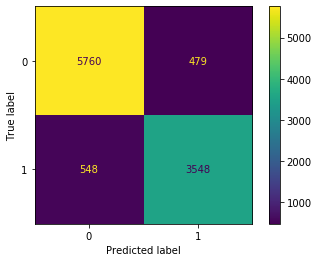

In [20]:
plot_confusion_matrix(fullPipeline,x_test,y_test)

In [21]:
y_test_prediction = fullPipeline.predict(x_test)
print(classification_report(y_test,y_test_prediction))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      6239
           1       0.88      0.87      0.87      4096

    accuracy                           0.90     10335
   macro avg       0.90      0.89      0.90     10335
weighted avg       0.90      0.90      0.90     10335



In [22]:
joblib.dump(fullPipeline,'pipline.pkl')

['pipline.pkl']

In [48]:
sadas

,online_order,book_table,votes,cost,type,city,cuisinesCount,rest_type
0,1,1,775,800,Buffet,Banashankari,30,Casual Dining
